Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
________________________________________________

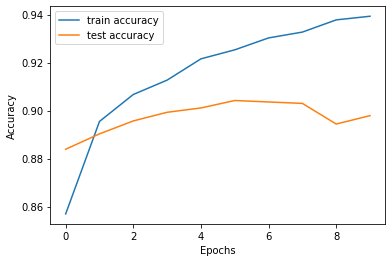

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from time import time

def main() :  
    
    #load db
    fashion_mnist = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    batch_size = 128

    train_images = train_images.reshape(60000, 28, 28, 1)
    test_images = test_images.reshape(10000, 28, 28, 1)
    
    #SCALE THIS data DURING 0 AND 1
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    
    
    
    #create model
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        #tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='elu'),
        #tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10,  activation='softmax')
    ])
    print(model.summary())
    
    adam = keras.optimizers.Adam(lr=0.01)
    model.compile(optimizer=adam,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
    
     #learn model
    start = time()
    history = model.fit(train_images, train_labels, validation_data = (test_images, test_labels),  epochs=10, batch_size= 128)
    train_time = time() - start
    print('\nTrain time: ', train_time)
    
    
    start = time()
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    test_time = time() - start
    print('\nTest accuracy:', test_acc)
    print('\nTest loss: ', test_loss)
    print('\nTest time: ', test_time)
    
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='test accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    main()

       